# Исследование рынка недвижимости (квартиры)

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

**Открываем файл и выведем его первые 5 строк и укажем опцию отображения всех столбцов датафрейма.**
<a id='item1_1'></a>[Переход к разделу 2](#item2_1)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Выведем общую информацию о датафрейме.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В названии столбца `cityCenters_nearest` встречается прописная буква, позже изменим в разделе предобработки данных название этого столбца для удобства.

**Добавим описание данных прямо сюда:**

- **`airports_nearest`** — расстояние до ближайшего аэропорта в метрах (м)
- **`balcony`** — число балконов
- **`ceiling_height`** — высота потолков (м)
- **`cityCenters_nearest`** — расстояние до центра города (м)
- **`days_exposition`** — сколько дней было размещено объявление (от публикации до снятия)
- **`first_day_exposition`** — дата публикации
- **`floor`** — этаж
- **`floors_total`** — всего этажей в доме
- **`is_apartment`** — апартаменты (булев тип)
- **`kitchen_area`** — площадь кухни в квадратных метрах (м²)
- **`last_price`** — цена на момент снятия с публикации
- **`living_area`** — жилая площадь в квадратных метрах (м²)
- **`locality_name`** — название населённого пункта
- **`open_plan`** — свободная планировка (булев тип)
- **`parks_around3000`** — число парков в радиусе 3 км
- **`parks_nearest`** — расстояние до ближайшего парка (м)
- **`ponds_around3000`** — число водоёмов в радиусе 3 км
- **`ponds_nearest`** — расстояние до ближайшего водоёма (м)
- **`rooms`** — число комнат
- **`studio`** — квартира-студия (булев тип)
- **`total_area`** — общая площадь квартиры в квадратных метрах (м²)
- **`total_images`** — число фотографий квартиры в объявлении

Числовые данные согласно описанию находятся во всех столбцах, кроме: **`first_day_exposition`** - *datetime*, **`is_apartment`** - *bool*, **`locality_name`** - *str*, **`open_plan`** - *bool*, **`studio`** - *bool*.

Однако, исходя из информации о датафрейме, есть расхождения в типах данных. Данную обработку будем проводить в разделе предобработка данных.

Также видно большое количество пропусков в данных, особенно в переменной **`is_apartment`**.

**Получим еще дополнительную информацию о датафрейме с помощью метода `describe()`.**

In [12]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что есть вопросы к данным во многих столбцах. Например минимальное значение для потолка в 1 метр - что очень странно для квартиры. Или следующие значения: количество комнат 0, жилая площадь в 2 кв. метра, расстояние до аэропорта в 0 метров. Или максимальные значения для высоты потолка в 100 метров, время размещения объявления в 1580 дней - нужно будет все это дополнительно проверить в разделе предобработки данных.

**Построим общую гистограмму для числовых переменных датафрейма с количеством корзин 12 и размером 15 x 20.**

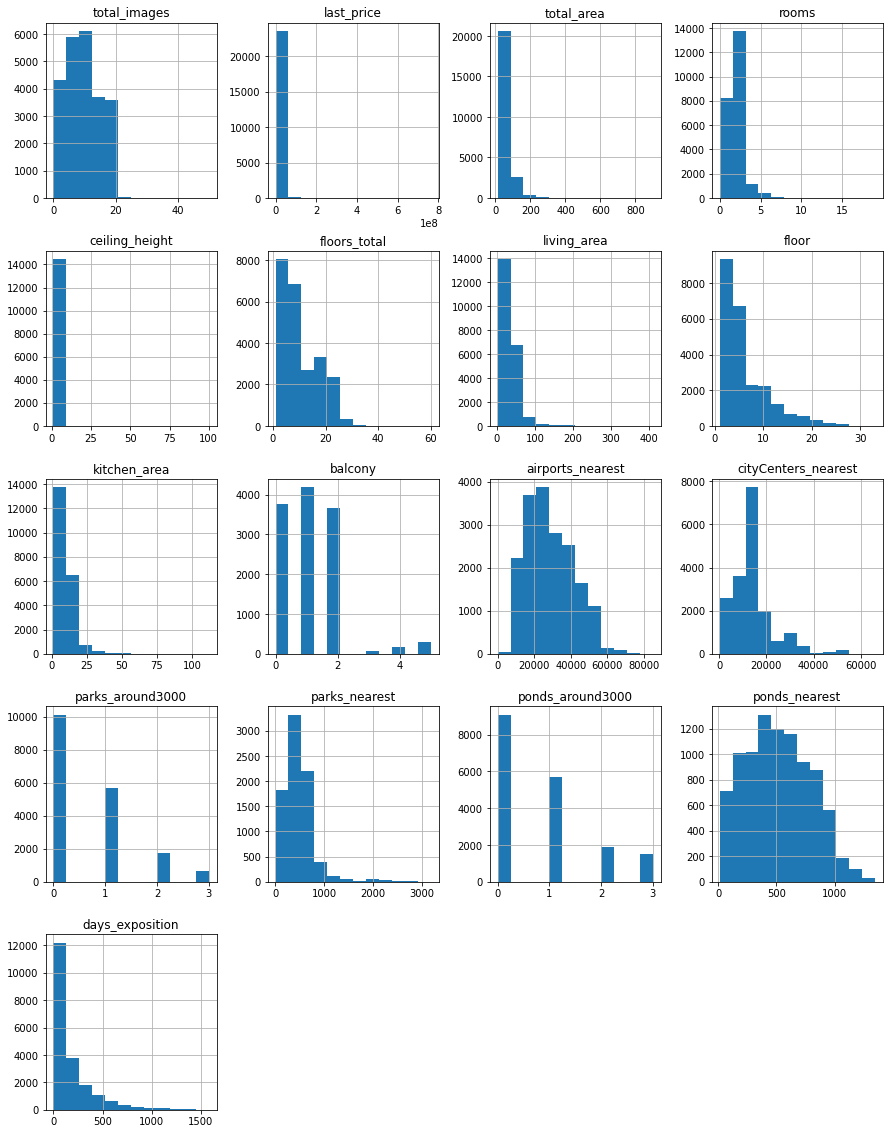

In [13]:
df.hist(bins=12, figsize=(15, 20));

Можно увидеть, что у многих гистограмм есть пик в значении 0, что может быть следствием аномалий в данных.

**Проверим датафрейм на наличие явных дубликатов.**

In [14]:
df.duplicated().sum()

0

**Строки-дубликаты в датафрейме отсутствуют.**

**Видно, что есть вопросы к данным во многих столбцах. Многие гистограммы имеют самый высокий пик у нуля, необходимо во втором разделе детально разобраться в причинах таких гистограмм. Название столбца `cityCenters_nearest` необходимо будет привести к корректному регистру, также необходимо будет скорректировать типы некоторых столбцов в датафрейме, они не соответствуют характеру данных в них.**

### Предобработка данных

**2.1 Поиск и изучение пропущенных значений.**

**Найдем и посчитаем, какая доля пропусков в данных каждого из столбцов датафрейма, используя методы `isna()` и `mean()`.**

In [15]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Большое количество пропусков данных в следующих столбцах:
- `ceiling_height` - 38,8% 
- `is_apartment` - 88.3% 
- `balcony` - 48,6%
- `airports_nearest` - 23,4%
- `cityCenters_nearest` - 23,3%
- `parks_around3000` - 23,3%
- `parks_nearest` - 65,9%
- `ponds_around3000` - 23,3%
- `ponds_nearest` - 61,6%
- `days_exposition` - 13,4%

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические, т.е. данные, созданные сервисом автоматически. 

К первому типу относятся такие как: высота потолка, количество этажей в доме, жилая площадь, является ли квартира апартаментами, площадь кухни, число балконов. 

Ко второму — название населенного пункта, расстояние до ближайшего аэропорта, расстояние до центра города, число парков в радиусе 3 км,  расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма и сколько дней было размещено объявление.

Пропуски в данных первого типа, т.е. которые вводит пользователь, связаны с незаполнением их пользователем.
Пропуски в данных второго типа, т.е. которые вводятся сервисом, связаны с возможными проблемами выгрузки данных или их формирования на стороне сервера.

**Нам необходимо проанализировать зависимость цены от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год). Поэтому мы не будем удалять полностью все строки с пропусками, т.к. в строках с пропусками может оставаться полезная для нас информация для анализа зависимости цены от одного из перечисленных показателей. Удалить можно лишь те строки, в которых есть пропуски во всех перечисленных столбцах.**

Укажем ниже по каждому из столбцов возможные варианты заполнения пропусков.


- `ceiling_height` - используем медианные значения по такому же населенному пункту, т.к. не заполнять высоту могут там, где она не является какой-то особенностью.
- `floors_total` - т.к. пропусков всего 0.36% и это один из ключевых параметров для анализа, то нет смысла эти пропуски заполнять какими-то значениями, отфильтруем эти данные.
- `living_area` - т.к. пропусков всего 8% и это один из ключевых параметров для анализа, то заполним их значением -1, чтобы не потерять в этих строках другие полезные для анализа данные.
- `is_apartment` - вероятно, пропуск означает, что квартира не является апартаментами, пропуски заполняем False.
- `kitchen_area` - т.к. пропусков всего 9.6% и это один из ключевых параметров для анализа, то заполним их значением -1, чтобы не потерять в этих строках другие полезные для анализа данные.
- `balcony` - вероятно, пропуск означает отсутствие балкона, пропуски заполняем значением 0.
- `locality_name` - пропуски в этой переменной нет возможности заполнить чем-то адекватным и их всего 0.2% от всех данных, поэтому отфильтруем данные  строки.
- `airports_nearest` - зависимость цены от данного параметра не изучается в п.3, поэтому можно пропуски заполнить значением -1.
- `cityCenters_nearest` - зависимость цены от данного параметра не изучается в п.3, поэтому можно пропуски заполнить значением -1.  
- `parks_around3000` - вероятно, пропуск означает отсутствие парков рядом, заполним значением 0.
- `parks_nearest` - вероятно, пропуск означает отсутствие парков рядом, заполним значением -1, что будет означать "далеко".
- `ponds_around3000` - вероятно, пропуск означает отсутствие пруда рядом, заполним значением 0.
- `ponds_nearest` - вероятно, пропуск означает отсутствие пруда рядом, заполним значением -1, что будет означать "далеко".
- `days_exposition`- пропуск может быть связан с тем, что объявление еще не было снято на момент выгрузки, заменим пропуск на количество дней от даты публикации до самой поздней из всех даты снятия объявлений.


**Проверим, есть ли такие строки в датафрейме, где пропущены сразу все интересующие нас значения.**

In [16]:
df.query('first_day_exposition.isna() & floor.isna() \
          & floors_total.isna() & kitchen_area.isna() \
          & last_price.isna() & living_area.isna() \
          & rooms.isna() & total_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Таких строк нет, поэтому пропуски мы будем заполнять каким-то характерным значением, но не удалять данные строки.**

**Создадим столбец `id`, которому присвоим первоначальные индексы всех исходных строк датафрейма для будущих сравнений и исследований.**

In [17]:
df['id'] = df.index

**Заполним пропуски в столбце `locality_name` значением '`unknown Unknown'`.** [Переход к началу](#item1_1) <a id='item2_1'></a>

In [18]:
df['locality_name'] = df['locality_name'].fillna('unknown Unknown')
df['locality_name'].isna().sum()

0

**Заполним пропуски в столбце `floors_total` значением -1. Предварительно проверим, как много строчек соответствуют первому этажу и имеют пропуски в данных количества этажей в доме, т.к. в этом случае это может быть частный одноэтажный дом.**

In [19]:
df.query('floors_total.isna() & floor == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,237
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,NaN,False,False,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0,3817
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,NaN,NaN,NaN,1,NaN,False,False,NaN,0.0,Красное Село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0,15989


**Видим, что явление не носит массовый характер, поэтому заполняем все пропуски в данных кол-ва этажей значением -1.**

In [20]:
df['floors_total'] = df['floors_total'].fillna(-1)
df['floors_total'].isna().sum()

0

**Заполним пропуски в столбце `living_area` значением -1.**

In [21]:
df['living_area'] = df['living_area'].fillna(-1)
df['living_area'].isna().sum()

0

**Заполним пропуски в столбце `is_apartment` значением False.**

In [22]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

**Заполним пропуски в столбце `kitchen_area` значением -1.**

In [23]:
df['kitchen_area'] = df['kitchen_area'].fillna(-1)
df['kitchen_area'].isna().sum()

0

**Заполним пропуски в столбце `balcony` значением 0, т.к. вероятнее всего, если пользователь не ввел никакое значение, это означает, что балкона у него нет.**

In [24]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

**Заполним пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` значением -1.**

In [25]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
display(df['kitchen_area'].isna().sum())
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-1)
display(df['cityCenters_nearest'].isna().sum())
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
display(df['parks_nearest'].isna().sum())
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)
df['ponds_nearest'].isna().sum()

0

0

0

0

**Заполним пропуски в столбцах `parks_around3000`, `ponds_around3000` значением 0, аналогично гипотезе пропусков с количеством балконов.**

In [26]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
display(df['parks_around3000'].isna().sum())
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

0

**Переименуем столбец `cityCenters_nearest` в соответствии со "змеиным" стандартом в `city_centers_nearest` с помощью метода `rename()` и с помощью метода `info()` проверим изменения.**

In [27]:
df.rename(columns={"cityCenters_nearest": "city_centers_nearest"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**2.3 Проверим теперь неявные дубликаты в столбце `locality_name`.**

In [28]:
df['locality_name'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown Unknown', 'Бокситогорск', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск',
       'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск',
       'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
     

**Видим, что большое количество населенных пунктов имеют условный префикс `'поселок'` \ `'поселок городского типа'` и т.д. Создадим дополнительный столбец в датафрейме с названием `locality_type`, куда будем заносить тип населенного пункта, а также столбец `locality`, куда будем заносить только название без типа, чтобы проще было отсеить неявные дубликаты и привести их к единому стандарту.**

**Для этого создадим две функции, каждая из которых вычленяет тип населенного пункта и его название. Применим данные функции и создадим из этих значений два новых столбца в датафрейме - с названием населенного пункта и его типом.**

In [29]:
def locality_core(x):
  spisok = x.split()
  y = 0
  new_spisok = []
  for element in spisok:
    if element[0].isupper():
      y += 1
      new_spisok.append(element)
  if y != 0:
    return ' '.join(new_spisok)
  else:
    return 'unknown'

def locality_type(x):
  spisok = x.split()
  y = 0
  new_spisok = []
  for element in spisok:
    if not element[0].isupper():
      y += 1
      new_spisok.append(element)
  if y != 0:
    return ' '.join(new_spisok)
  else:
    return 'город'

df['locality'] = df['locality_name'].apply(locality_core)
df['locality_type'] = df['locality_name'].apply(locality_type)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,город
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,посёлок
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,-1.0,9,False,False,False,-1.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,23694,Санкт-Петербург,город
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,23695,Тосно,город
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,False,False,-1.00,0.0,село Рождествено,-1.0,-1.0,0.0,-1.0,0.0,-1.0,NaN,23696,Рождествено,село
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,-1.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,23697,Санкт-Петербург,город


In [30]:
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'город', 'городской поселок', 'городской посёлок',
       'деревня', 'коттеджный поселок', 'коттеджный посёлок', 'поселок',
       'поселок городского типа', 'поселок городского типа имени',
       'поселок станции', 'посёлок', 'посёлок 69-й километр',
       'посёлок городского типа', 'посёлок городского типа имени',
       'посёлок при железнодорожной станции', 'посёлок станции',
       'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'село'], dtype=object)

**Среди названий населенных пунктов я не выявил неявных дубликатов, однако, среди типов населенных пунктов - их достаточно. Приведем их к единому стилю, для начала примем написание через букву Е.**

In [31]:
df['locality_type'] = df['locality_type'].str.replace('ё', 'е')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'город', 'городской поселок', 'деревня',
       'коттеджный поселок', 'поселок', 'поселок 69-й километр',
       'поселок городского типа', 'поселок городского типа имени',
       'поселок при железнодорожной станции', 'поселок станции',
       'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'село'], dtype=object)

**Количество различных типов населенных пунктов уменьшилось, мы продвинулись в выявлении неявных дубликатов. Продолжим.**

**Проверим, какие названия попали в тип `'поселок 69-й километр'`.**

In [32]:
df[['locality_type', 'locality', 'locality_name']].query('locality_type == "поселок 69-й километр"')

,locality_type,locality,locality_name
7646,поселок 69-й километр,Платформа,посёлок Платформа 69-й километр


**Проверим теперь, сколько строк в датафрейме имеют значение населенного пункта `'Платформа'`.**

In [33]:
df[['locality_type', 'locality', 'locality_name']].query('locality == "Платформа"')

,locality_type,locality,locality_name
7646,поселок 69-й километр,Платформа,посёлок Платформа 69-й километр


**Видим, что это ошибка нашего процесса парсинга данных. Исправим ее.**

In [34]:
df['locality'] = df['locality'].replace('Платформа', 'Платформа 69-й километр')
df['locality_type'] = df['locality_type'].replace('поселок 69-й километр', 'поселок')
df.query('locality == "Платформа 69-й километр"')[['locality_type', 'locality', 'locality_name']]

,locality_type,locality,locality_name
7646,поселок,Платформа 69-й километр,посёлок Платформа 69-й километр


**Теперь проверим, какие названия попали в тип `'поселок городского типа имени'`.**

In [35]:
df.query('locality_type == "поселок городского типа имени"')['locality_name'].unique()

array(['поселок городского типа имени Свердлова',
       'посёлок городского типа имени Морозова',
       'посёлок городского типа имени Свердлова'], dtype=object)

**Видим, что это ошибка нашего процесса парсинга данных. Исправим ее.**

In [36]:
df['locality'] = df['locality'].replace('Свердлова', 'имени Свердлова')
df['locality'] = df['locality'].replace('Морозова', 'имени Морозова')
df['locality_type'] = df['locality_type'].replace('поселок городского типа имени', 'поселок городского типа')
df.query('locality in ["имени Свердлова","имени Свердлова"]')[['locality_type', 'locality', 'locality_name']]

,locality_type,locality,locality_name
1594,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
2016,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
2055,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
2208,поселок городского типа,имени Свердлова,посёлок городского типа имени Свердлова
2388,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
3125,поселок городского типа,имени Свердлова,посёлок городского типа имени Свердлова
4416,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
5372,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
8148,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
8229,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова


**Заменим значения типов населенного пункта `'городской поселок'` и `'поселок городского типа'` на `'ПГТ'`, тем самым уберем неявные дубликаты.**

In [37]:
df['locality_type'] = df['locality_type'].replace(['городской поселок','поселок городского типа'], 'ПГТ')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'ПГТ', 'город', 'деревня', 'коттеджный поселок',
       'поселок', 'поселок при железнодорожной станции',
       'поселок станции', 'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'село'], dtype=object)

**Видим, что часть значений все еще пересекаются по смыслу.**

**Посмотрим, что попадает в`'садовое товарищество'` и `'садоводческое некоммерческое товарищество'`.**

In [38]:
df.query('locality_type in ["садовое товарищество", "садоводческое некоммерческое товарищество"]')['locality_name']

101                       садовое товарищество Новая Ропша
2711                            садовое товарищество Рахья
7323     садоводческое некоммерческое товарищество Лесн...
18587                           садовое товарищество Садко
19635                    садовое товарищество Приладожский
Name: locality_name, dtype: object

**Из поисковика становится понятно, что все это называется СНТ. Переименуем для данных типов значение в `'СНТ'`.**

In [39]:
df['locality_type'] = df['locality_type'].replace(['садовое товарищество','садоводческое некоммерческое товарищество'], 'СНТ')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'ПГТ', 'СНТ', 'город', 'деревня', 'коттеджный поселок',
       'поселок', 'поселок при железнодорожной станции',
       'поселок станции', 'село'], dtype=object)

**Проделаем аналогичную проверку для типов `'поселок при железнодорожной станции'` и `'поселок станции'`.**

In [40]:
df.query('locality_type in ["поселок при железнодорожной станции", "поселок станции"]')['locality_name']

1625                               поселок станции Корнево
1982                                поселок станции Вещево
3249                         поселок станции Приветнинское
5300                                поселок станции Вещево
9512            посёлок при железнодорожной станции Вещево
10385                              посёлок станции Громово
11596    посёлок при железнодорожной станции Приветнинское
14911                                посёлок станции Свирь
15629                              поселок станции Лужайка
18486                        поселок станции Приветнинское
18976                                посёлок станции Свирь
19585                              посёлок станции Громово
20040                              посёлок станции Громово
22925                               поселок станции Вещево
22952                               поселок станции Вещево
Name: locality_name, dtype: object

**Видим, что значения пересекаются, дополнительная проверка в поисковике дает понять, что все это можно назвать поселками при жд станции, т.е. переименуем данные типы в `'поселок при жд станции'`.**

In [41]:
df['locality_type'] = df['locality_type']. \
replace(['поселок при железнодорожной станции','поселок станции'], 'поселок при жд станции')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'ПГТ', 'СНТ', 'город', 'деревня', 'коттеджный поселок',
       'поселок', 'поселок при жд станции', 'село'], dtype=object)

**Видим, что теперь типов населенных пунктов стало намного меньше, что привело к уменьшению неявных дубликатов.**

**Проверим теперь, есть ли пересечения между оставшимися типами населенных пунктов для одних и тех же названий населенных пунктов.**

In [42]:
#функция поиска пересечений в названиях населенных пунктов двух фильтрованных по разным типам населенных пунктов датафреймов
def find_types_dupl(data, type1, type2):
    return df[df['locality_type'] == type1].merge(df[df['locality_type'] == type2], on='locality')['locality'].unique()

locality_unique_types = df['locality_type'].unique() #список уникальных типов населенных пунктов

#цикл перебора всех комбинаций двух различных типов населенных пунктов с выводом ненулевых пересечений
s = 0
for type1 in locality_unique_types:
    s += 1
    for type2 in range(s, len(locality_unique_types)):
        if find_types_dupl(df, type1, locality_unique_types[type2]).size > 0:
            print(f'пересечение типов {type1} и {locality_unique_types[type2]} в нас. пунктах:')
            print(find_types_dupl(df, type1, locality_unique_types[type2]))
            print()

пересечение типов город и поселок в нас. пунктах:
['Мурино' 'Любань']

пересечение типов город и деревня в нас. пунктах:
['Кудрово']

пересечение типов город и село в нас. пунктах:
['Никольское']

пересечение типов поселок и ПГТ в нас. пунктах:
['Рябово']

пересечение типов поселок и деревня в нас. пунктах:
['Зимитицы' 'Щеглово' 'Гарболово' 'Калитино' 'Рабитицы']

пересечение типов поселок и поселок при жд станции в нас. пунктах:
['Громово']

пересечение типов поселок и коттеджный поселок в нас. пунктах:
['Лесное']

пересечение типов ПГТ и деревня в нас. пунктах:
['Фёдоровское']

пересечение типов ПГТ и СНТ в нас. пунктах:
['Рахья' 'Приладожский']

пересечение типов ПГТ и село в нас. пунктах:
['Павлово']



**Согласно информации из поисковика, включая сервис Яндекс.Карты:**

**`'Мурино'` ранее являлся поселком, теперь он является городом, исправим тип на город для данного населенного пункта.**

**`'Кудрово'` - есть как деревня, так и город, но деревня находится не в Ленинградской области, а в пояснении к заданию сказано, что населенные пункты в датафрейме - соседние к СПб. Исправим тип на город.**

**`'Никольское'` - есть как город, так и село. Изменение типов не требуется.**

**`'Рябово'`- есть как ПГТ, так и поселок. Изменение типов не требуется.**

**`'Зимитицы'`, `'Щеглово'`, `'Гарболово'`, `'Калитино'`, `'Рабитицы'` - есть как поселок, так и деревня. Изменение типов не требуется.**
 
**`'Громово'` - есть как поселок, так и поселок при жд станции. Изменение типов не требуется.**

**`'Лесное'` - есть как поселок, так и коттеджный поселок. Изменение типов не требуется.**

**`'Фёдоровское'` - есть как деревня, так и ПГТ, но деревня находится не в Ленинградской области, а в пояснении к заданию сказано, что населенные пункты в датафрейме - соседние к СПб. Исправим тип на ПГТ.**

**`'Рахья'`, `'Приладожский'` - есть как ПГТ, так и СНТ. Изменение типов не требуется.**

**`'Павлово'` - есть как ПГТ, так и село. Изменение типов не требуется.**

**Внесем данные изменения в датафрейм.**

In [43]:
df.loc[df['locality'] == 'Мурино', 'locality_type'] = 'город'
df[df['locality'] == "Мурино"]['locality_type'].unique()

array(['город'], dtype=object)

In [44]:
df.loc[df['locality'] == 'Кудрово', 'locality_type'] = 'город'
df[df['locality'] == "Кудрово"]['locality_type'].unique()

array(['город'], dtype=object)

In [45]:
df.loc[df['locality'] == 'Фёдоровское', 'locality_type'] = 'ПГТ'
df[df['locality'] == "Фёдоровское"]['locality_type'].unique()

array(['ПГТ'], dtype=object)

**Теперь склеим название населенных пунктов с их типом в новый столбец `'new_locality_name'`.**

In [46]:
df['new_locality_name'] = df[['locality_type', 'locality']].agg(' '.join, axis=1)
df['new_locality_name'] = df['new_locality_name'].replace('unknown Unknown', 'Unknown')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,город,город Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,-1.0,9,False,False,False,-1.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Заполним теперь пропуски в столбце `ceiling_height` с помощью медианных значений высоты потолков соответствующих конкретному населенному пункту.**

In [48]:
df['ceiling_height'].fillna(df.groupby('new_locality_name')['ceiling_height'].transform('median'), inplace=True)
df['ceiling_height'].isna().sum()

100

**Количество оставшихся пропусков в данном столбце = 100, т.к. по данным населенным пунктам во всех объявлениях стоит NaN, т.е. медиана тоже NaN.**

In [49]:
df.query('ceiling_height.isna()').groupby('locality')['ceiling_height'].median()

locality
Алексеевка        NaN
Аро               NaN
Белоостров        NaN
Большое Рейзино   NaN
Большой Сабск     NaN
                   ..
Чудской Бор       NaN
Шугозеро          NaN
Шум               NaN
Щеглово           NaN
Ям-Тесово         NaN
Name: ceiling_height, Length: 69, dtype: float64

 **Заменим оставшиеся пропуски значением -1.**

In [50]:
df['ceiling_height'].fillna(-1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**2.2 Рассмотрим теперь типы данных в столбцах, и там, где необходимо, скорректируем их.**

**Тип данных столбца `floors_total` float, приведем его к действительному типу для количества этажей  здания - типу int.**

In [52]:
df['floors_total'] = df['floors_total'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Тип данных столбца `balcony` float, приведем его к действительному типу для количества балконов - типу int.**

In [53]:
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Тип данных столбца `first_day_exposition` object, приведем его к действительному типу для даты и времени - datetime, чтобы было удобно работать со значениями как с датой и временем используя встроенные методы.**

In [54]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Теперь разберемся с пропусками в столбце `days_exposition`. Как ранее я отметил, гипотеза в том, что пропуски есть в тех объявлениях, в которых объявление еще не было снято на момент выгрузки данных. Для заполнения пропусков определим предполагаемую дату выгрузки всего датафрейма. Для этого необходимо будет найти самую позднюю дату, т.е. самое позднее значение `first_day_exposition` + `days_exposition` и сравнить ее с самой поздней датой публикации (`first_day_exposition`) во всем датафрейме.**

In [55]:
df['end_date'] = df['first_day_exposition'] + pd.to_timedelta(df['days_exposition'], unit='d', errors='coerce')
display(df['end_date'].max())
df['first_day_exposition'].max()

Timestamp('2019-05-02 00:00:00')

Timestamp('2019-05-03 00:00:00')

**Видим, что дата размещения самого нового объявления на 1 день больше, чем последняя дата снятия объявления. Можно сделать вывод, что дата выгрузки всего датафрейма - 3 мая 2019 года. Допустим, что пропуски в столбце `days_exposition` связаны как раз с тем, что данные объявления еще не были закрыты на момент 3 мая 2019 года, соответственно, заполним данные пропуски значением -1.**

In [56]:
df['days_exposition'] = df['days_exposition'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**2.4 Теперь посмотрим на наличие аномалий в данных, которые мы планируем анализировать.**

**Отфильтруем выбросы в столбцах, для которых мы будем искать далее корреляцию: `total_area`, `living_area`, `kitchen_area`, `rooms`.**<a id='item2_x'></a>

In [57]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.716996,10.631461,31.610631,5.892358,9.457692,0.591080,22060.051648,10886.194017,0.469049,166.656399,0.590911,198.498544,156.474619,11849.000000
std,5.682529,1.088701e+07,35.654083,1.078405,1.030454,6.622500,23.221116,4.885249,6.569058,0.959298,16455.589811,9634.876850,0.748534,307.069717,0.883999,305.590550,213.645563,6841.456351
min,0.000000,1.219000e+04,12.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,17.800000,2.000000,6.300000,0.000000,10196.500000,2242.000000,0.000000,-1.000000,0.000000,-1.000000,22.000000,5924.500000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,29.000000,4.000000,9.000000,0.000000,21869.000000,11247.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000,11849.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,199.000000,17773.500000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,23698.000000


**Начнем со столбца `rooms`. Видим минимальное значение 0, что достаточно странно. Отфильтруем датафрейм по этому значению и посмотрим.**

In [58]:
df.query('rooms == 0').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7,-1.0,6,False,False,True,-1.0,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,19392,Санкт-Петербург,город,город Санкт-Петербург,2018-10-24
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5,60.5,2,False,True,False,-1.0,0,Санкт-Петербург,26972.0,5819.0,0.0,-1.0,1.0,674.0,537.0,20082,Санкт-Петербург,город,город Санкт-Петербург,2019-04-29
3458,6,7400000.0,73.6,2017-05-18,0,2.70,3,50.0,1,False,True,False,-1.0,0,Санкт-Петербург,26581.0,6085.0,0.0,-1.0,1.0,348.0,60.0,3458,Санкт-Петербург,город,город Санкт-Петербург,2017-07-17
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5,68.0,5,False,True,False,-1.0,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,21227,Санкт-Петербург,город,город Санкт-Петербург,2017-08-20
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7,33.0,6,False,True,False,-1.0,0,Санкт-Петербург,14509.0,8288.0,0.0,-1.0,0.0,-1.0,-1.0,13613,Санкт-Петербург,город,город Санкт-Петербург,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1350000.0,18.8,2017-11-22,0,2.75,19,15.8,1,False,True,False,-1.0,0,Санкт-Петербург,37636.0,14479.0,0.0,-1.0,1.0,1127.0,128.0,8755,Санкт-Петербург,город,город Санкт-Петербург,2018-03-30
12996,8,1900000.0,18.0,2019-01-25,0,2.60,5,16.0,3,False,True,False,-1.0,0,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0,12996,Санкт-Петербург,город,город Санкт-Петербург,2019-02-04
716,5,1500000.0,17.0,2017-06-07,0,2.70,9,12.0,1,False,True,False,-1.0,0,посёлок Шушары,18654.0,29846.0,0.0,-1.0,0.0,-1.0,40.0,716,Шушары,поселок,поселок Шушары,2017-07-17
9412,5,2100000.0,16.0,2017-12-10,0,2.70,6,13.0,1,False,False,True,-1.0,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,9412,Санкт-Петербург,город,город Санкт-Петербург,2017-12-13


**Видим, что значение 0 комнат характерно либо для значения True столбца `studio`, либо для столбца `open_plan`, что кажется логичным, т.е. если помещение со свободной планировкой, либо является студией можно сделать вывод, что там в классическом понимании 0 комнат. Проверим данную гипотезу, для всех ли нулевых значений количества комнат в датафрейме применимо данное правило. Сравним количество значений, попадающих в два вида фильтрации.**

In [59]:
display(len(df[(df['rooms'] == 0) & (df['studio'] | df['open_plan'])]))
len(df.query('rooms == 0'))

197

197

**Количество значений совпало, что подтверждают гипотезу относительно нулевых значений столбца `rooms`.**

**Посмотрим диаграмму размаха для значений столбца `rooms`.**

<AxesSubplot:>

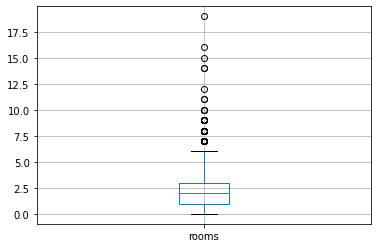

In [60]:
df.boxplot(column='rooms')

**Посчитаем количество выбивающихся значений в долях.**

In [61]:
df[df['rooms'] > 6]['rooms'].count()/df['rooms'].count()

0.00379762859192371

**Видим, что высокие значения количества комнат составляют небольшую долю (0.38%) от общего числа значений. Отфильтруем датафрейм от этих данных.**

In [196]:
df = df[df['rooms'] < 6]

**Проанализируем значения в других столбцах.**

**Посмотрим диаграмму размаха для значений столбца `total_area`.**

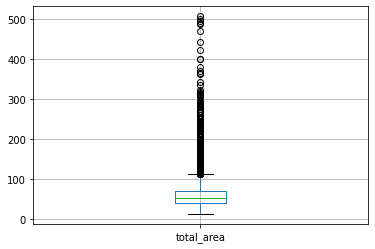

In [201]:
df.boxplot(column='total_area');

In [203]:
df[df['total_area'] > 112.5]['total_area'].count() / df['total_area'].count() #доля значений вне "усов"

0.04799183117767188

**Отфильтруем строки с выбросами данного столбца из датафрейма.**

In [205]:
df = df[df['total_area'] <= 112.5]

**Посмотрим диаграмму размаха для значений столбца `living_area`.**

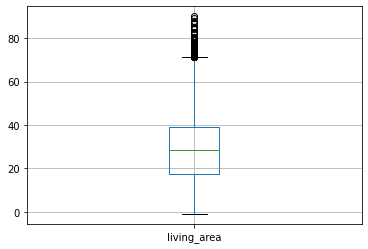

In [206]:
df.boxplot(column='living_area');

In [210]:
df[df['living_area'] > 71.1]['living_area'].count() / df['living_area'].count() #доля значений вне "усов"

0.0054969610296746515

**Отфильтруем строки с выбросами данного столбца из датафрейма.**

In [212]:
df = df[df['living_area'] <= 71.1]

**Посмотрим диаграмму размаха для значений столбца `kitchen_area`.**

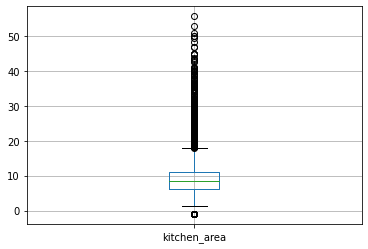

In [214]:
df.boxplot(column='kitchen_area');

In [216]:
df[df['kitchen_area'] > 18.05]['kitchen_area'].count() / df['kitchen_area'].count() #доля значений вне "усов"

0.035950208960589584

**Отфильтруем строки с выбросами данного столбца из датафрейма.**

In [218]:
df = df[df['kitchen_area'] <= 18.05]

In [62]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.716996,10.631461,31.610631,5.892358,9.457692,0.591080,22060.051648,10886.194017,0.469049,166.656399,0.590911,198.498544,156.474619,11849.000000
std,5.682529,1.088701e+07,35.654083,1.078405,1.030454,6.622500,23.221116,4.885249,6.569058,0.959298,16455.589811,9634.876850,0.748534,307.069717,0.883999,305.590550,213.645563,6841.456351
min,0.000000,1.219000e+04,12.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,17.800000,2.000000,6.300000,0.000000,10196.500000,2242.000000,0.000000,-1.000000,0.000000,-1.000000,22.000000,5924.500000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,29.000000,4.000000,9.000000,0.000000,21869.000000,11247.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000,11849.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,199.000000,17773.500000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,23698.000000


**Посмотрим диаграмму размаха для значений столбца `ceiling_height`.**

<AxesSubplot:>

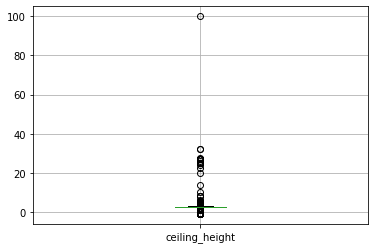

In [63]:
df.boxplot(column='ceiling_height')

**Ограничим значения отрезком от 0 до 7.**

<AxesSubplot:>

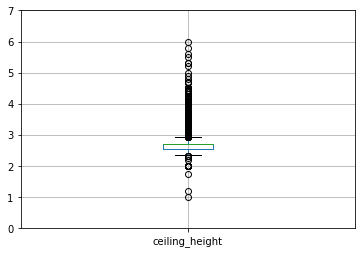

In [64]:
plt.ylim([0,7])
df.boxplot(column='ceiling_height')

**Посчитаем количество выбивающихся значений в долях.**

In [65]:
df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 3)]['ceiling_height'].count()/df['ceiling_height'].count()

0.07008734545761425

**Всего 7% данных выбиваются, что не велико и не окажет серьезного влияния на наш анализ.**

**Посмотрим на эти значения в датафрейме.**

In [66]:
df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
110,6,3850000.0,72.3,2017-09-29,2,-1.0,3,27.4,2,False,False,False,23.6,0,деревня Пикколово,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,110,Пикколово,деревня,деревня Пикколово,2017-11-13
17119,8,1150000.0,50.9,2017-08-25,2,-1.0,2,28.3,2,False,False,False,8.5,1,деревня Куровицы,-1.0,-1.0,0.0,-1.0,0.0,-1.0,280.0,17119,Куровицы,деревня,деревня Куровицы,2018-06-01
16393,10,1800000.0,79.5,2018-10-17,3,-1.0,3,55.0,3,False,False,False,9.0,0,деревня Пижма,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,16393,Пижма,деревня,деревня Пижма,NaT
16274,18,440000.0,40.0,2018-07-10,1,-1.0,5,-1.0,1,False,False,False,-1.0,0,деревня Старополье,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,16274,Старополье,деревня,деревня Старополье,2018-08-24
16030,0,1700000.0,62.0,2018-03-30,3,-1.0,5,-1.0,5,False,False,False,-1.0,0,поселок Красносельское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,16030,Красносельское,поселок,поселок Красносельское,2018-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10,30.1,3,False,False,False,8.1,2,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,71.0,10773,Мурино,город,город Мурино,2017-12-23
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,-1.0,0.0,-1.0,61.0,21377,Санкт-Петербург,город,город Санкт-Петербург,2017-06-18
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,-1.0,3.0,511.0,-1.0,22336,Санкт-Петербург,город,город Санкт-Петербург,NaT
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,3148,Волхов,город,город Волхов,NaT


**Двухзначные значения, начинающиеся с 2 и 3, скорректируем в 10 раз, скорее всего пользователи ошиблись при вводе в поле и не поставили десятичный разделитель.**

In [67]:
def ceiling_height_correct(x):
    if (20 <= x) and (x < 40):
        return x / 10
    else:
        return x

df['ceiling_height'] = df['ceiling_height'].apply(ceiling_height_correct)
df[df['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,22869,Санкт-Петербург,город,город Санкт-Петербург,2018-08-13


**Проверим теперь остальные выбросы. Зададим условия, которые соответствуют реальной адекватной высоте потолков в квартире.**

In [68]:
df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
110,6,3850000.0,72.3,2017-09-29,2,-1.0,3,27.4,2,False,False,False,23.6,0,деревня Пикколово,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,110,Пикколово,деревня,деревня Пикколово,2017-11-13
17428,4,1450000.0,43.8,2018-12-12,2,-1.0,2,30.3,1,False,False,False,5.3,1,поселок Кирпичное,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,17428,Кирпичное,поселок,поселок Кирпичное,NaT
17332,14,1580000.0,28.0,2017-11-26,1,-1.0,2,17.0,1,False,False,False,5.0,0,поселок Кобринское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,44.0,17332,Кобринское,поселок,поселок Кобринское,2018-01-09
17145,3,1100000.0,52.6,2018-08-14,2,-1.0,5,-1.0,2,False,False,False,-1.0,0,посёлок Плоское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,17145,Плоское,поселок,поселок Плоское,2018-09-28
17119,8,1150000.0,50.9,2017-08-25,2,-1.0,2,28.3,2,False,False,False,8.5,1,деревня Куровицы,-1.0,-1.0,0.0,-1.0,0.0,-1.0,280.0,17119,Куровицы,деревня,деревня Куровицы,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,-1.0,-1.0,0.0,-1.0,0.0,-1.0,125.0,3474,Нурма,деревня,деревня Нурма,2018-07-19
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,-1.0,1.0,613.0,14.0,5863,Санкт-Петербург,город,город Санкт-Петербург,2018-08-29
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,False,False,-1.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,22309,Санкт-Петербург,город,город Санкт-Петербург,2018-02-13
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,-1.0,0.0,-1.0,315.0,15061,Санкт-Петербург,город,город Санкт-Петербург,2019-03-22


**Вместо удаления аномальных значений создадим новый столбец `ceiling_height_new` в который аномальным значениям и пропускам присвоим -1, а остальные значения сохраним. Напишем для этого функцию и применим ее. Будем использовать здравый смысл и аномальными значениями высоты потолков считать значения < 2 или > 6.**

In [69]:
def ceiling_height_filter(x):
    if (2 > x) or (x > 6):
        return -1
    else:
        return x

df['ceiling_height_new'] = df['ceiling_height'].apply(ceiling_height_filter)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03


In [70]:
df['ceiling_height_new'].describe()

count    23699.000000
mean         2.686934
std          0.338222
min         -1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height_new, dtype: float64

**Видим теперь, что наша фильтрация применена корректно.**

**Посмотрим аномалии в других столбцах.**

In [71]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,ceiling_height_new
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.694131,10.631461,31.610631,5.892358,9.457692,0.591080,22060.051648,10886.194017,0.469049,166.656399,0.590911,198.498544,156.474619,11849.000000,2.686934
std,5.682529,1.088701e+07,35.654083,1.078405,0.721949,6.622500,23.221116,4.885249,6.569058,0.959298,16455.589811,9634.876850,0.748534,307.069717,0.883999,305.590550,213.645563,6841.456351,0.338222
min,0.000000,1.219000e+04,12.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,17.800000,2.000000,6.300000,0.000000,10196.500000,2242.000000,0.000000,-1.000000,0.000000,-1.000000,22.000000,5924.500000,2.550000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,29.000000,4.000000,9.000000,0.000000,21869.000000,11247.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000,11849.000000,2.700000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,199.000000,17773.500000,2.700000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,23698.000000,6.000000


**Видим, что по другим столбцам нет аномальных значений, выходящих за грани разумного смысла характеристик недвижимости (высоту потолка смотрим из нового столбца `ceiling_height_new`).**

**Проверим теперь, есть ли строки с противоречиями (исключая пропуски выраженные значением -1):**
- жилая площадь больше общей, 
- площадь кухни больше общей, 
- высота текущего этажа больше этажности здания.

In [72]:
df.query('(living_area > total_area) & (living_area != -1)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new


In [73]:
df.query('(kitchen_area > total_area) & (living_area != -1) & (kitchen_area != -1)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new


In [74]:
df.query('(floors_total < floor) & (floors_total != -1)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new


**Как видим, такого рода аномалии не найдены.**

### Добавим в таблицу новые столбцы

**3.1 Добавим в датафрейм новый столбец цена одного квадратного метра, назовем его `one_square_price`.**

In [75]:
df['one_square_price'] = (df['last_price'] / df['total_area']).astype(int)

In [76]:
df.describe()['one_square_price']

count    2.369900e+04
mean     9.942121e+04
std      5.030681e+04
min      1.110000e+02
25%      7.658500e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: one_square_price, dtype: float64

**3.2 Добавим в датафрейм новый столбец день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), назовем его `post_weekday`.**

In [77]:
df['post_weekday'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70,120370,3
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70,408176,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03,100000,1


**3.3 Добавим в датафрейм новый столбец месяц публикации объявления, назовем его `post_month`.**

In [78]:
df['post_month'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70,120370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70,408176,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03,100000,1,6


**3.4 Добавим в датафрейм новый столбец год публикации объявления, назовем его `post_year`.**

In [79]:
df['post_year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month,post_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03,100000,1,6,2018


**3.5 Добавим в датафрейм новый столбец тип этажа квартиры (значения — «первый», «последний», «другой»), назовем его `floor_type`.**

**Для этого создадим функцию, которая будет определять эти значения, отфильтровывая значения -1, которыми мы заменили пропуски в столбце этажа.**

In [80]:
def identify_floor_type(row):
    if row['floors_total'] > 0:
        if row['floors_total'] == row['floor']:
            return 'последний'
        elif row['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
    else:
        return 'не определен'

df['floor_type'] = df.apply(identify_floor_type, axis=1)
df['floor_type'].value_counts()

другой          17363
последний        3361
первый           2889
не определен       86
Name: floor_type, dtype: int64

**3.6  Добавим в датафрейм новый столбец расстояние до центра города в километрах, округлим до целого и назовем его `to_center_km`.**

In [81]:
df['to_center_km'] = (df['city_centers_nearest'] / 1000).astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month,post_year,floor_type,to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70,408176,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03,100000,1,6,2018,другой,8


### Проведем исследовательский анализ данных

**4.1.1 Изучим значения столбца с общей площадью.**

**Построим сначала гистограмму с числом корзин 100 для данного столбца.**

<AxesSubplot:>

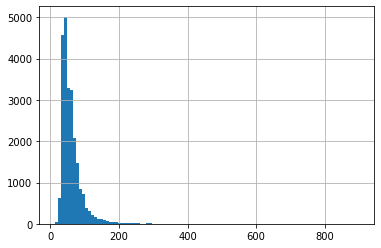

In [82]:
df['total_area'].hist(bins=100)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [83]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

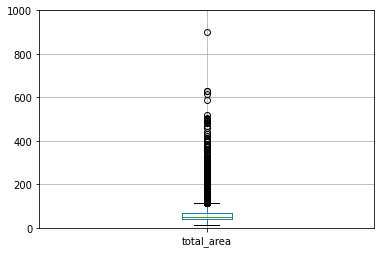

In [84]:
plt.ylim([0,1000])
df.boxplot(column='total_area')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами. Для этого напишем функцию `usy_boxplota()`, определяющую нижнюю и верхнюю границы "усов".**

In [85]:
def usy_boxplota(df, column):
    min = df[column].min()
    max = df[column].max()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR  = Q3 - Q1
    lowest = (lambda: min if min > Q1 - 1.5 * IQR else Q1 - 1.5 * IQR)
    highest = (lambda: max if max < Q3 + 1.5 * IQR else Q3 + 1.5 * IQR)
    return [lowest(), highest()]

usy_boxplota(df, 'total_area')

[12.0, 114.75000000000001]

**Проверим теперь, как много значений попало в выбросы.**

In [86]:
max = usy_boxplota(df, 'total_area')[1]
df.query('total_area > @max')['total_area'].count() / df['total_area'].count()

0.052322882822060005

**Всего 5% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.2 Изучим значения столбца с жилой площадью.**

**Построим сначала гистограмму с числом корзин 75 для данного столбца без учета пропусков, обозначенных значением -1.**

<AxesSubplot:>

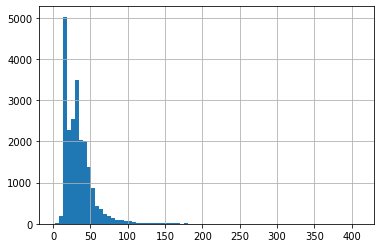

In [87]:
t2 = df.query('living_area > 0').copy()
t2['living_area'].hist(bins=75)

**Видим необычное распределение значений с двумя вершинами.**

**Определим теперь, какие именно группы значений образовали данные две вершины.**

In [88]:
pd.cut(t2['living_area'], bins=75).sort_values(ascending=False).value_counts().head(10)

(12.872, 18.308]    5028
(29.18, 34.616]     3482
(23.744, 29.18]     2543
(18.308, 23.744]    2272
(34.616, 40.052]    2041
(40.052, 45.488]    2014
(45.488, 50.924]    1375
(50.924, 56.36]      872
(56.36, 61.796]      440
(61.796, 67.232]     357
Name: living_area, dtype: int64

**Изучим происхождение данных двух пиков в датафрейме.**

**Предположим связь пиков с двумя типами недвижимости, т.е. частные дома и квартиры. У нас нет столбца, отражающего данный вопрос, но посмотрим, как в данных двух лидирующих диапазонах площади соотносится количество типов населенных пунктов. Косвенно можно считать, что в городе в основном продаются квартиры, а в поселках и т.д - частные дома.**

In [89]:
display(t2.query('(living_area <= 18.308) & (living_area > 12.872)')['locality_type']
                .reset_index()['locality_type']
                .value_counts()
       .head())

(t2.query('(living_area <= 34.616) & (living_area > 29.18)')['locality_type']
                .reset_index()['locality_type']
                .value_counts()
       .head())

город      4259
поселок     458
деревня     170
ПГТ         127
село          5
Name: locality_type, dtype: int64

город      3016
поселок     239
деревня     113
ПГТ          94
село          8
Name: locality_type, dtype: int64

**Связь двух пиков с типом населенного пункта не подтвердилась.**
**Аналогичным образом была проведена проверка связи с апартаментами, открытой планировкой и студией, нигде прямая связь не подтвердилась.**

**Проверим теперь на связь от количества комнат.**

In [90]:
t2['rooms'].value_counts().head() #посмотрим на распределение по количеству комнтат

1    7388
2    7296
3    5366
4    1089
5     292
Name: rooms, dtype: int64

**Видим в датафрейме почти равное количество объектов 1-комнатных и 2-комнатных.**

**Посмотрим на связь данных диапазонов с количеством комнат в объекте недвижимости.**

In [91]:
display(t2.query('(living_area <= 18.308) & (living_area > 12.872)')['rooms']
                .reset_index()['rooms']
                .value_counts()
       .head())

(t2.query('(living_area <= 34.616) & (living_area > 29.18)')['rooms']
                .reset_index()['rooms']
                .value_counts()
       .head())

1    4884
0     101
2      40
3       3
Name: rooms, dtype: int64

2    3218
3     193
1      66
0       3
4       2
Name: rooms, dtype: int64

**Видим, что есть прямая зависимость диапазона жилой площади от количества комнат в объекте недвижимости. При этом выше мы определелили, что в датафрейме очень близкое количество объявлений с 1-комнатными и 2-комнатными объектами. Очевидно, что жилая площадь зависит прямо от количества комнат в объекте, что подтверждается двумя характерными пиками на гистограмме. Количество объектов с 3 комнатами меньше, чем с 1 или 2, но посмотрим, увидим ли мы характерный 3 пик в гистограмме, если увеличим количество корзин в ней.**

<AxesSubplot:>

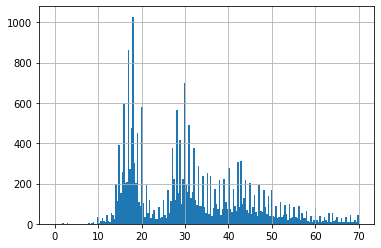

In [92]:
t2['living_area'].hist(bins=200, range=(0, 70))

**При более детальном рассмотрении гистограммы с бОльшим кол-вом корзин явно видна модуляция от количества комнат в квартире, что логично. Природа аномальных пиков гистограммы для жилой площади объяснена.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [93]:
t2['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

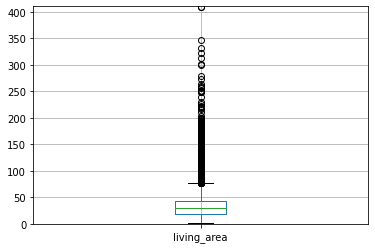

In [94]:
plt.ylim([0,410])
t2.boxplot(column='living_area')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [95]:
usy_boxplota(t2, 'living_area')

[2.0, 77.85]

**Проверим теперь, как много значений попало в выбросы.**

In [96]:
max = usy_boxplota(t2, 'living_area')[1]
t2.query('living_area > @max')['living_area'].count() / t2['living_area'].count()

0.035465222976692974

**Всего 3,5% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.3 Изучим значения столбца с площадью кухни.**

**Построим сначала гистограмму с числом корзин 50 для данного столбца без учета пропусков, обозначенных значением -1.**

<AxesSubplot:>

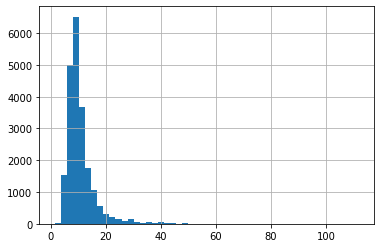

In [97]:
t3 = df.query('kitchen_area > 0').copy()
t3['kitchen_area'].hist(bins=50)

**Видим нормальное распределение значений.**

**В сравнении с жилой площадью мы не наблюдаем характерных нескольких пиков, т.к. обычно нет настолько дискретной связи между количеством комнат и площадью кухни, как между количеством комнат и жилой площадью.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [98]:
t3['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

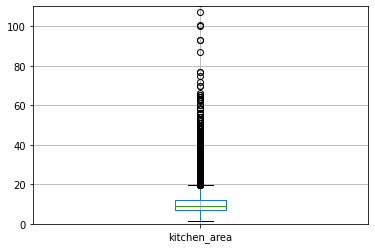

In [99]:
plt.ylim([0,110])
t3.boxplot(column='kitchen_area')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [100]:
usy_boxplota(t3, 'kitchen_area')

[1.3, 19.5]

**Проверим теперь, как много значений попало в выбросы.**

In [101]:
max = usy_boxplota(t3, 'kitchen_area')[1]
t3.query('kitchen_area > @max')['kitchen_area'].count() / t3['kitchen_area'].count()

0.05555296204658979

**Всего 5,6% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.4 Изучим значения столбца с ценой объекта.**

**Построим сначала гистограмму с числом корзин 100 для данного столбца с диапазоном цены до 10^8.**

<AxesSubplot:>

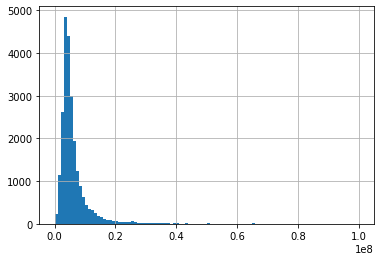

In [102]:
df['last_price'].hist(bins=100, range=(0, 10 ** 8))

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [103]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

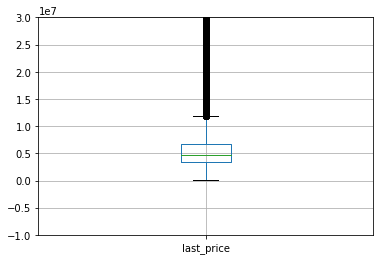

In [104]:
plt.ylim([-10000000, 3*10 ** 7])
df.boxplot(column='last_price')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [105]:
usy_boxplota(df, 'last_price')

[12190.0, 11900000.0]

**Проверим теперь, как много значений попало в выбросы.**

In [106]:
max = usy_boxplota(df, 'last_price')[1]
df.query('last_price > @max')['last_price'].count() / df['last_price'].count()

0.08582640617747585

**Всего 8,5% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.5 Изучим значения столбца с количеством комнат.**

**Построим сначала гистограмму с числом корзин 10 для данного столбца.**

<AxesSubplot:>

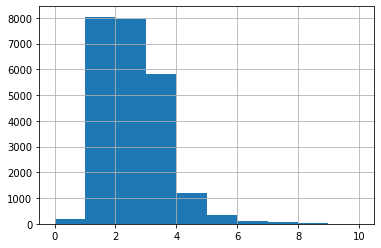

In [107]:
df['rooms'].hist(bins=10, range=(0, 10))

**Видим нормальное распределение значений. Ранее в п. 4.1.2 уже отмечали равное кол-во объектов с 1 и 2 комнатами, вследствие чего видим две рядом стоящие вершины.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [108]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

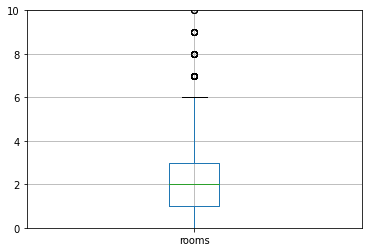

In [109]:
plt.ylim([0,10])
df.boxplot(column='rooms')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [110]:
usy_boxplota(df, 'rooms')

[0, 6.0]

**Проверим теперь, как много значений попало в выбросы.**

In [111]:
max = usy_boxplota(df, 'rooms')[1]
df.query('rooms > @max')['rooms'].count() / df['rooms'].count()

0.00379762859192371

**Всего 0,4% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.6 Изучим значения столбца с высотой потолков.**

**Построим сначала гистограмму с числом корзин 30 для данного столбца без учета пропусков, обозначенных значением -1.**

<AxesSubplot:>

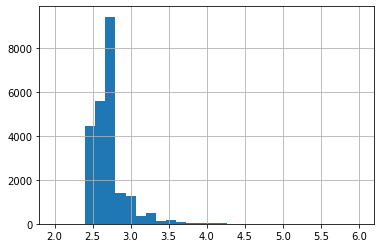

In [112]:
t6 = df.query('ceiling_height_new > 0')
t6['ceiling_height_new'].hist(bins=30)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [113]:
t6['ceiling_height_new'].describe()

count    23589.000000
mean         2.704127
std          0.226363
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height_new, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

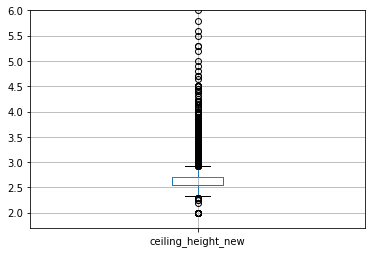

In [114]:
plt.ylim([1.7, 6])
t6.boxplot(column='ceiling_height_new')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [115]:
usy_boxplota(t6, 'ceiling_height_new')

[2.3249999999999993, 2.9250000000000007]

**Проверим теперь, как много значений попало в выбросы.**

In [116]:
min = usy_boxplota(t6, 'ceiling_height_new')[0]
max = usy_boxplota(t6, 'ceiling_height_new')[1]
df.query('(ceiling_height_new > @max) | (ceiling_height_new < @min)') \
['ceiling_height_new'].count() / df['ceiling_height_new'].count()

0.1192033419131609

**12% значений попали в выбросы.**

**4.1.7 Изучим значения столбца с этажом объекта.**

**Построим сначала гистограмму с числом корзин 15 для данного столбца.**

<AxesSubplot:>

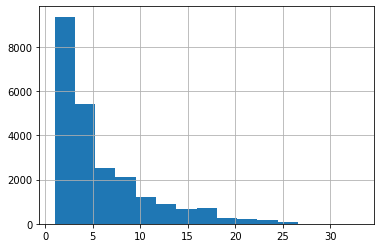

In [117]:
df['floor'].hist(bins=15)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [118]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

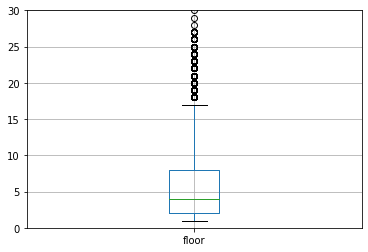

In [119]:
plt.ylim([0,30])
df.boxplot(column='floor')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [120]:
usy_boxplota(df, 'floor')

[1, 17.0]

**Проверим теперь, как много значений попало в выбросы.**

In [121]:
max = usy_boxplota(df, 'floor')[1]
df.query('floor > @max')['floor'].count() / df['floor'].count()

0.03890459513059623

**Всего 4% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.8 Изучим значения столбца с типом этажа квартиры.**

In [122]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month,post_year,floor_type,to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70,408176,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03,100000,1,6,2018,другой,8


**Построим сначала гистограмму с числом корзин 100 для данного столбца.**

<AxesSubplot:>

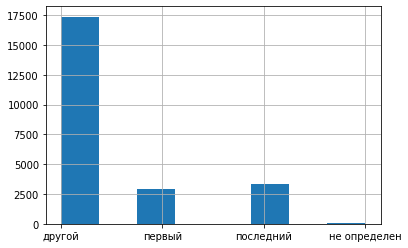

In [123]:
df['floor_type'].hist(bins=8)

**Видим дискретное распределение значений, т.к значения данного столбца носят дискретный характер - это категориальная переменная. Строить ее гистограмму неинформативно, можно ограничиться столбчатой диаграммой.**

**Видим, что сильно превалирует значение "другой", на 2 месте по распространенности - последний этаж, однако, количество объявлений с первым и последним этажом достаточно близко относительно общего числа объявлений.**

**4.9 Изучим значения столбца с общим количеством этажей в доме.**

**Построим сначала гистограмму с числом корзин 15 для данного столбца без учета пропусков, обозначенных значением -1.**

<AxesSubplot:>

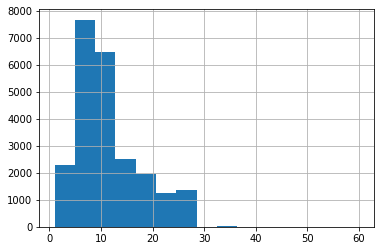

In [124]:
t9 = df.query('floors_total > 0')
t9['floors_total'].hist(bins=15)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [125]:
t9['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

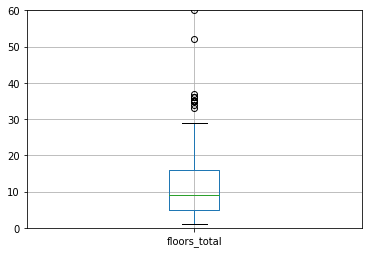

In [126]:
plt.ylim([0,60])
t9.boxplot(column='floors_total')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [127]:
usy_boxplota(t9, 'floors_total')

[1, 32.5]

**Проверим теперь, как много значений попало в выбросы.**

In [128]:
max = usy_boxplota(t9, 'floors_total')[1]
t9.query('floors_total > @max')['floors_total'].count() / t9['floors_total'].count()

0.0013551857027908356

**Всего 0,1% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.10 Изучим значения столбца расстояние до центра города в метрах.**

**Построим сначала гистограмму с числом корзин 100 для данного столбца, исключая значения -1, соответствующие пропускам в данных.**

<AxesSubplot:>

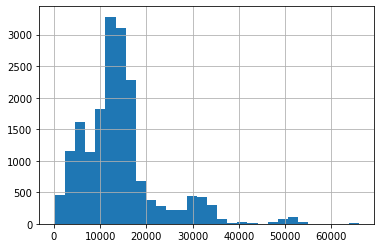

In [129]:
t10 = df.query('city_centers_nearest >= 0')
t10['city_centers_nearest'].hist(bins=30)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [130]:
t10['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

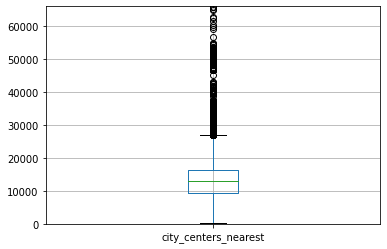

In [131]:
plt.ylim([0,66000])
t10.boxplot(column='city_centers_nearest')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [132]:
usy_boxplota(t10, 'city_centers_nearest')

[181.0, 26875.5]

**Проверим теперь, как много значений попало в выбросы.**

In [133]:
max = usy_boxplota(t10, 'city_centers_nearest')[1]
t10.query('city_centers_nearest > @max')['city_centers_nearest'].count() / df['city_centers_nearest'].count()

0.07287227309169163

**Всего 7% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.11 Изучим значения столбца расстояние до ближайшего аэропорта.**

**Построим сначала гистограмму с числом корзин 20 для данного столбца, исключая пропуски в виде значений -1.**

<AxesSubplot:>

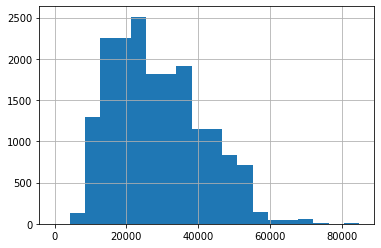

In [134]:
t11 = df.query('airports_nearest >= 0')
t11['airports_nearest'].hist(bins=20)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [135]:
t11['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

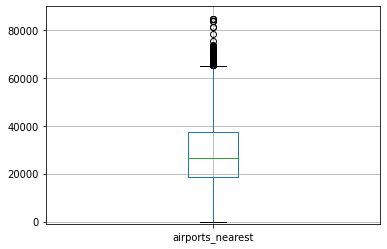

In [136]:
plt.ylim([-1000,90000])
t11.boxplot(column='airports_nearest')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [137]:
usy_boxplota(t11, 'airports_nearest')

[0.0, 65305.0]

**Проверим теперь, как много значений попало в выбросы.**

In [138]:
max = usy_boxplota(t11, 'airports_nearest')[1]
t11.query('airports_nearest > @max')['airports_nearest'].count() / t11['airports_nearest'].count()

0.005672743294597125

**Всего 0.4% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.12 Изучим значения столбца расстояние до ближайшего парка.**

**Построим сначала гистограмму с числом корзин 50 для данного столбца, исключая пропуски в виде значений -1.**

<AxesSubplot:>

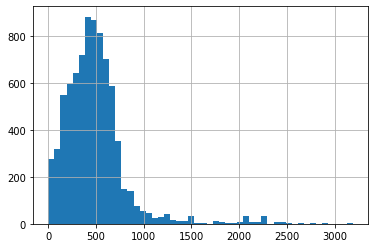

In [139]:
t12 = df.query('parks_nearest >= 0')
t12['parks_nearest'].hist(bins=50)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [140]:
t12['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

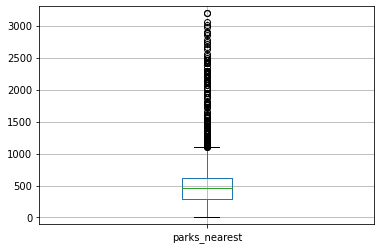

In [141]:
plt.ylim([-100,3300])
t12.boxplot(column='parks_nearest')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [142]:
usy_boxplota(t12, 'parks_nearest')

[1.0, 1098.0]

**Проверим теперь, как много значений попало в выбросы.**

In [143]:
max = usy_boxplota(t12, 'parks_nearest')[1]
t12.query('parks_nearest > @max')['parks_nearest'].count() / t12['parks_nearest'].count()

0.03886619631142468

**Всего 3.9% значений, что совсем некритично для использования всех значений для дальнейшего анализа.**

**4.1.13 Изучим значения столбца с днем публикации объявления.**

**Построим сначала гистограмму с числом корзин 7 для данного столбца.**

<AxesSubplot:>

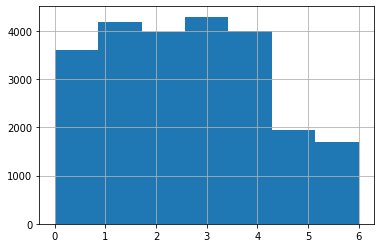

In [144]:
df['post_weekday'].hist(bins=7)

**Видим, что на выходные дни происходит спад в подаче объявлений, а с понедельника идёт рост их количества, самые пиковые значения приходятся на вторник и четверг.**

**Т.к. это категориальная переменная, лучше всего данные смотреть в виде столбчатой диаграммы.**

**4.1.14 Изучим значения столбца с месяцем публикации объявления.**

**Построим сначала гистограмму с числом корзин 12 для данного столбца.**

<AxesSubplot:>

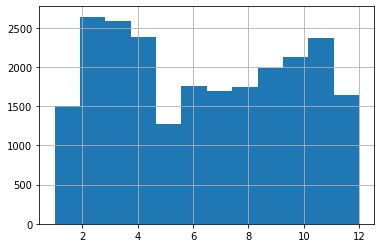

In [145]:
df['post_month'].hist(bins=12)

**Видим, что спад в размещении объявлений приходится на январь, май и декабрь, что логично в следствие длительных государственных праздников в РФ в эти месяцы. После января количество объявлений резко растет, потом плавный спад до март и резкий спад в апреле, после апреля плавный рост до ноября.**

**Т.к. мы имеем дело с категориальной переменной, то лучше всего смотреть распределение на обычной столбчатой диаграмме.**

**4.2 Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.**

**Построим сначала гистограмму с числом корзин 70 для данного столбца, исключая значения -1, соответствующие пропускам в данных.**

<AxesSubplot:>

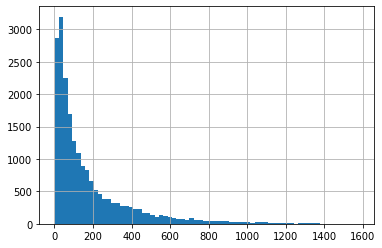

In [146]:
t20 = df.query('days_exposition > 0')
t20['days_exposition'].hist(bins=70)

**Видим нормальное распределение значений.**

**Посмотрим теперь на минимальное, максимальное и среднее значения в данном столбце.**

In [147]:
t20['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Обычно продажа занимает 95 дней, видим по медианному значению.**

**Построим диаграмму размаха, чтобы посмотреть, какие значения находятся в нормальном диапазоне, а какие уже являются выбросами.**

<AxesSubplot:>

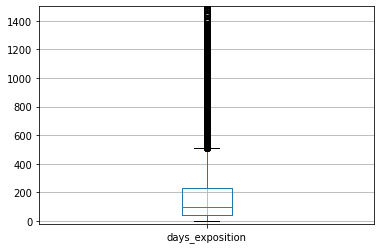

In [148]:
plt.ylim([-20,1500])
t20.boxplot(column='days_exposition')

**Теперь узнаем числовые значения, которые соответствуют концам "усов" диаграммы, чтобы оценить, как много значений попали вне нормального диапазона и являются выбросами.**

In [149]:
usy_boxplota(t20, 'days_exposition')

[1.0, 512.5]

**Необычно долгие продажи - продажи более 512 дней. Необычно быстрые - в день размещения объявления.**

**Проверим теперь, как много значений попало в выбросы.**

In [150]:
max = usy_boxplota(t20, 'days_exposition')[1]
t20.query('days_exposition > @max')['days_exposition'].count() / t20['days_exposition'].count()

0.08134321083926309

**Всего 8% значений являются выбросами.**

**4.3 Определим, какие факторы больше всего влияют на общую (полную) стоимость объекта.**

**Изучим, зависит ли цена от:**
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

**Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией будем использовать сводные таблицы.**

**Посмотрим корреляцию между стоимостью и указанными параметрами. Найдем коэффициент корреляции Пирсона.**

In [151]:
df_for_corr = (df[['total_area', 'last_price', 'living_area', 'kitchen_area', 
            'rooms', 'floor_type']].copy()
        .query('living_area > 0 & kitchen_area > 0')
       ) #отфильтровали из исходного дф только интересующие нас столбцы без пропусков (значений -1)
df_for_corr.corr()['last_price'].reset_index() #использовали метод для поиска корреляций

,index,last_price
0,total_area,0.691330
1,last_price,1.000000
2,living_area,0.603242
3,kitchen_area,0.517540
4,rooms,0.391013


**Для категориальных столбцов, таких как день, месяц и год размещения объявления некорректно применять данный метод. Сравним медианные значения стоимости для уникальных значений данных столбцов и построим для них столбчатые диаграммы.**

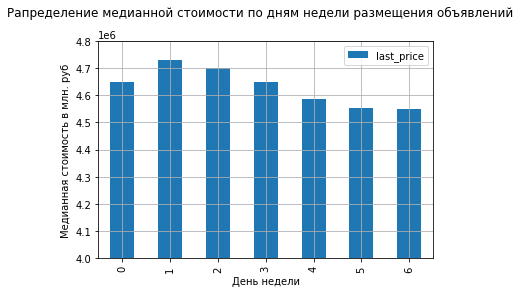

In [180]:
(df
 .pivot_table(index='post_weekday', values='last_price', aggfunc='median')
 .plot(kind='bar'));
plt.xlabel('День недели');
plt.ylim(4*10**6, 4.8*10**6)
plt.ylabel('Медианная стоимость в млн. руб');
plt.grid(True)
plt.suptitle('Рапределение медианной стоимости по дням недели размещения объявлений', size=12, y=1);   
plt.show()

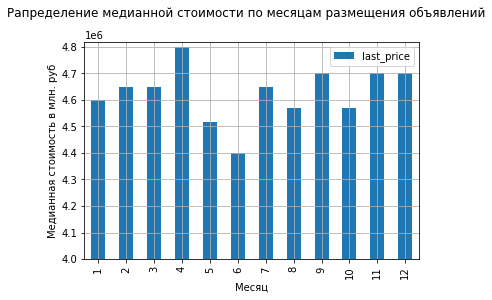

In [186]:
(df
 .pivot_table(index='post_month', values='last_price', aggfunc='median')
 .plot(kind='bar'));
plt.xlabel('Месяц');
plt.ylim(4*10**6, 4.82*10**6)
plt.ylabel('Медианная стоимость в млн. руб');
plt.grid(True)
plt.suptitle('Рапределение медианной стоимости по месяцам размещения объявлений', size=12, y=1);   
plt.show()

In [2]:
(df
 .pivot_table(index='post_year', values='last_price', aggfunc='median')
 .plot(kind='bar'));
plt.xlabel('Год');
plt.ylim(4*10**6, 8*10**6)
plt.ylabel('Медианная стоимость в млн. руб');
plt.grid(True)
plt.suptitle('Рапределение медианной стоимости по годам размещения объявлений', size=12, y=1);   
plt.show()

NameError: name 'df' is not defined

**Итак, что мы видим:**

- Зависимость стоимости от общей площади есть и достаточно сильная.
- Зависимость стоимости от жилой площади есть, но слаблее, чем от общей площади.
- Зависимость стоимости от площади кухни есть, но еще более слабая, т.е. в целом не слишком сильная.
- Зависимость стоимости от количества комнат есть, но очень слабая, еще слабее, чем от площади кухни.
- Самая высокая медиана стоимости характерна для вторника, после чего идет на спад вплоть до воскресенья. 
- На апрель приходится в среднем самая дорогая стоимость объектов, на июнь - самая дешевая. 
- В 2014 медианная стоимость объекта значительно выше остальных лет, далее спад стоимости до 2017 и после 2017 незначительный рост.

**Посмотрим теперь это на диаграммах рассеяния.**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

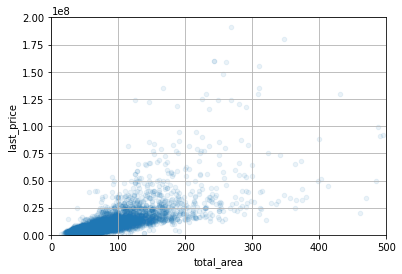

In [219]:
df_for_corr.plot(x='total_area', y='last_price', kind='scatter', alpha=0.09, grid=True, xlim=(0,500), ylim=(0,2*10**8)) 

**Видим, что линейная зависимость прослеживается, но при площади от 150 и выше значения начинают очень сильно отличаться, в том случае на стоимость уже оказывает влияние какие-то доп. факторы.**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

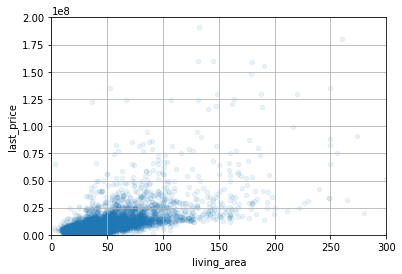

In [220]:
df_for_corr.plot(x='living_area', y='last_price', kind='scatter', alpha=0.09, grid=True, xlim=(0,300), ylim=(0,2*10**8)) 

**Видим, что линейная зависимость прослеживается, но при площади от 50 и выше значения начинают очень сильно отличаться, в том случае на стоимость уже оказывает влияние какие-то доп. факторы.**

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

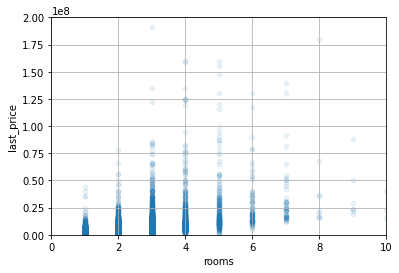

In [144]:
df_for_corr.plot(x='rooms', y='last_price', kind='scatter', alpha=0.09, grid=True, xlim=(0,10), ylim=(0,2*10**8))

**4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [148]:
top10 = df['new_locality_name'].value_counts().head(10).reset_index().copy() #выделили топ-10 населенных пунктов
top10.rename(columns={'index': 'new_locality_name', 'new_locality_name': 'count'}, inplace=True) #изменили название столбцов
top10

,new_locality_name,count
0,город Санкт-Петербург,15721
1,город Мурино,590
2,город Кудрово,472
3,поселок Шушары,440
4,город Всеволожск,398
5,город Пушкин,369
6,город Колпино,338
7,поселок Парголово,327
8,город Гатчина,307
9,город Выборг,237


In [149]:
#создали сводную таблицу для нас. пунктов и медианы стоимости "квадрата" и объединили с таблицей выше, отсортировав значения
(df.pivot_table(index='new_locality_name', values='one_square_price', aggfunc='median')
 .merge(top10, on='new_locality_name')
 .sort_values(by='one_square_price', ascending=False))

,new_locality_name,one_square_price,count
7,город Санкт-Петербург,104761.0,15721
6,город Пушкин,100000.0,369
4,город Кудрово,95675.0,472
8,поселок Парголово,91642.0,327
5,город Мурино,86175.0,590
9,поселок Шушары,76876.0,440
3,город Колпино,74723.5,338
2,город Гатчина,67796.0,307
0,город Всеволожск,65789.0,398
1,город Выборг,58158.0,237


**Самая дорогая стоимость "квадрата" в Спб, самая дешевая из топ-10 по кол-ву объявлений - в Выборге.**

**4.5 Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишим, как стоимость объектов зависит от расстояния до центра города.**

In [150]:
price_per_km = df.query('locality == "Санкт-Петербург"')[['to_center_km', 'last_price']].copy()
price_per_km.groupby('to_center_km').median()

,last_price
to_center_km,
0,10681500.0
1,10835000.0
2,9500000.0
3,8500000.0
4,9900000.0
5,8920262.0
6,8005000.0
7,7500000.0
8,6500000.0


<AxesSubplot:xlabel='to_center_km'>

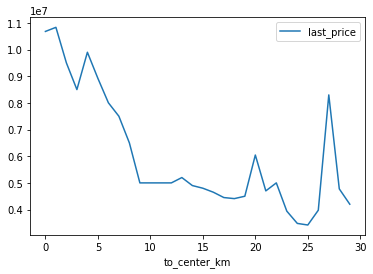

In [151]:
price_per_km.groupby('to_center_km').median().plot()

**Видим, что стоимость падает по мере удаления от центра города. Однако, на расстоянии 5 км от центра есть резкий всплеск стоимости, который, возможно, соответствует какому-то дорогому району СПб, например, Петроградскому району. По мере удаления от центра СПб стоимость падает, но на 20 км от центра и на 27 км есть огромные всплески, которые наверняка соответствуют каким-то элитным загородным районам СПб, где размещаются коттеджи\таунхаусы и т.д.** 

### Общий вывод

**Выгрузка данных происходила 3 мая 2019 года, поэтому для части данных нет информации о дате снятия объявления, часть объявлений оставалось активными на момент выгрузки, их стоимость продажи могла в итоге скорректироваться относительно исходной информации в датафрейме.**

**Обычно продажа занимает 95 дней**

**Превалируют объявления с 1 и 2 комнатами (почти одинаковое кол-во)**

**По типу этажей сильно превалирует значение "другой", на 2 месте по распространенности - последний этаж, однако, количество объявлений с первым и последним этажом достаточно близко относительно общего числа объявлений.**

**На выходные дни происходит спад в количестве размещенных объявлений, а с понедельника идёт рост их количества, самые пиковые значения приходятся на вторник и четверг.**

**Спад в размещении объявлений приходится на январь, май и декабрь, что логично вследствие длительных государственных праздников в РФ в эти месяцы. После января количество объявлений резко растет, потом плавный спад до марта и резкий спад в апреле, после апреля плавный рост до ноября.**

**Самая высокая медиана стоимости характерна для вторника, после чего идет на спад вплоть до воскресенья.**

**На апрель приходится в среднем самая дорогая стоимость объектов, на июнь - самая дешевая.**

**В 2014 медианная стоимость объекта значительно выше остальных лет, далее спад стоимости до 2017 и после 2017 незначительный рост.**

**Зависимость стоимости наиболее сильна от общей площади объекта и от населенного пункта.**

**Самая дорогая стоимость "квадрата" в Спб, самая дешевая из топ-10 по кол-ву объявлений - в Выборге, отличие почти в 2 раза.**

**Внутри СПб стоимость падает по мере удаления от центра города. Однако, на расстоянии 5 км от центра есть резкий всплеск стоимости, который, возможно, соответствует какому-то дорогому району СПб, например, Петроградскому району. По мере удаления от центра СПб стоимость падает, но на 20 км от центра и на 27 км есть огромные всплески, которые наверняка соответствуют каким-то элитным загородным районам СПб, где размещаются коттеджи\таунхаусы и т.д.**









